# Machine Learning for HCAI
Assistant Prof. Alberto Cabri - alberto.cabri@unimi.it

Assistant Prof. Mauricio Soto - mauricio.soto@unimi.it

# Lecture#23 - Genetic Algorithms
### Introduction
The theory of evolution by natural selection, proposed by C. Darwin in 1859, suggests that all species on
Earth stem from one or more very simple self-reproducing molecules in the primeval soup. 

<div style="float: right; text-align:center; width:250px">
<figure>
    <img src="darwin_species.png" alt="darwin"/>
    <figcaption><small>The origin of species (1859)</small></figcaption>
</figure>
</div>

According to the theory, we evolved by accumulating countless advantageous (in context) mutations over countless generations, and species have diversified to occupy environmental niches, as a result of different environments favouring different mutations.

In general, organisms that produce more offsprings which are better equipped to survive in their environment will grow to maturity, and are most likely to reproduce and pass their traits to the next generation. Conversely, those that are lacking in such fitness either do not reach the age of reproduction or produce fewer offsprings (**survival of the fittest**). 

Nonetheless, if an environment changes, the traits that enhance survival in that environment will also gradually change, or evolve. 

According to Darwin,
* __mutations__ occur in every species
* evolution is due to __natural selection__ which selects individuals that are best fitted to the environment
* in a __constant environment__ no changes occur as variants tend to lose in the struggle for life therefore species preserve their identity
* in a __varying environment__ some variants will be better than the originals and will be preserved thus creating new species

Please note that __natural selection__ does not mean __survival of the fittest__:
* __fittest__ means __best adapted__, not _in the best conditions_
* __best adapted__ refers to a __niche__, that is a _relevant subset_ of the environment
* __length of life__ does not mean __fertility__
* __fertility__ does not mean __successful reproduction__

#### How natural selection works
1. individuals of a population which are fitter with respect to their environment tend to survive and reproduce longer
2. their characteristics, encoded in their genes, are transmitted to the offspring and tend to propagate into new generations
3. in sexual reproduction, the chromosomes of the offspring are a mix of those of their parents
4. offspring’s characteristics are partially inherited from their parents, and partially the result of new genes created during the reproduction process

Many terms used in computer science are borrowed from cells and their structure:
* a __chromosome__ is a long DNA (DeoxyriboNucleic Acid) molecule that contains the genetic material of an organism: it stores and transmits information. Chromosomal recombination during meiosis plays a significant role in genetic diversity
* the molecular __gene__ is a sequence of organic molecules in DNA that is transcribed to produce a functional RNA (RiboNucleic Acid)

According to molecular biology
* DNA replicates to produce more DNA
* DNA is transcribed into RNA which is translated into proteins

During these processes, DNA can undergo __mutations__ that most often cause deleterious effects, even though they might not be lethal for the individual.

Another important phenomenon known as __crossover__ implies a reciprocal exchange of segments of DNA between non-sister pairs of homologous chromosomes, that join, duplicate and exchange genetic material.

### Evolutionary Computation
Evolutionary algorithms (EAs) are optimization and search procedures inspired by genetics and the process of natural selection. 

On the ground of the structures undergoing optimisation, the reproduction strategies, the genetic operators adopted, EAs can be grouped in:
* Genetic Algoritms (Holland, 1962) - GA
* Evolution Strategies (Rechemberg, 1973) - ES
* Evolutionary Programming (Fogel, 1962) - EP
* Classifier Systems (Holland, 1976) - CS
* Genetic Programming (Koza, 1999) - GP
* Particle Swarm Optimization (Kennedy-Eberhart-Shim, 1995) - PSO

Evolutionary computation has many applications in engineering: function optimization, combinatorial optimization, machine learning and problem solving.

The following table reports the analogies between nature notions and their meaning in computer science:
<table>
    <thead>
        <td style="text-align: center"><b>Nature</b></td>
        <td style="text-align: center"><b>Computer</b></td>
    </thead>
    <tbody>
    <tr>
        <td style="text-align: left">Individual</td>
        <td style="text-align: left">Solution to a problem</td>
    </tr>
    <tr>
        <td style="text-align: left">Population</td>
        <td style="text-align: left">Set of solutions</td>
    </tr>
    <tr>
        <td style="text-align: left">Fitness</td>
        <td style="text-align: left">Quality of a solutions</td>
    </tr>
    <tr>
        <td style="text-align: left">Chromosome</td>
        <td style="text-align: left">Representation for a solutions (e.g. set of parameters)</td>
    </tr>
    <tr>
        <td style="text-align: left">Gene</td>
        <td style="text-align: left">Part of the representation of a solutions (e.g. parameter or degree of freedom)</td>
    </tr>
    <tr>
        <td style="text-align: left">Growth</td>
        <td style="text-align: left">Decoding of the representation of solutions</td>
    </tr>
    <tr>
        <td style="text-align: left">Crossover, mutation</td>
        <td style="text-align: left">Search operators</td>
    </tr>
    <tr>
        <td style="text-align: left">Natural selection</td>
        <td style="text-align: left">Reuse of good sub-solutions</td>
    </tr>
    </tbody>
</table>

The steps of a generic evolutionary algorithm are all or part of the following:
1. initialize population
2. evaluate population
3. repeat
    1. select sub-population for reproduction - __selection__
    2. recombine the _genes_ of selected parents - __crossover__
    3. mutate the mated population stochastically - __mutation__
    4. evaluate the fitness of the new population
    5. select the survivors from the actual fitness

### The Simple Genetic Algorithm (SGA) or Canonical Genetic Algorithm (CGA) - John Holland 1965
<div style="float: right; text-align:center; width:250px">
<figure>
    <img src="sga_flow.png" alt="sga_flow_chart"/>
    <figcaption><small>Simple Genetic Algorithm</small></figcaption>
</figure>
</div>

A __genetic algorithm__ is a search heuristic that reflects the process of natural selection where the fittest individuals are chosen to produce the offspring of the next generation.

A __search space__ is the set of all possible solutions to the problem.

A __candidate solution__ is referred to as an __individual__ and the process follows iteratively the steps below:
* parent individuals generate offspring individuals
* the resultant offspring are evaluated for their fitness
* the fittest offspring individuals survive and become parents

Each individual solution is encoded as a chromosome which in turn is represented by a set of genes, where parameter values can be encoded into binary strings of fixed and finite length:
* a __gene__, representing a parameter of the solution, becomes a __binary field__
* a __chromosome__, representing an individual, becomes a binary string, or a set of binary fields, encoding a prospective solution to the given problem

Long string length might improve resolution but requires more computational time.

#### Binary representation
It is the most frequently used method of encoding to represent a gene in terms of bits, suitable for optimization in a discrete search space.

Let $f(x)$ be the fitness function to maximize, where $x \in \Omega: \Omega = \lfloor x_{min}, x_{max} \rceil$, the n-bits binary representation of $x$ will be $x_{bin} = [b_{n-1}, \cdots, b_0]$. 

The values $\lfloor x_{min}, x_{max} \rceil$ can be mapped to $[0, 2^n-1]$, thus obtaining
$$ 
\begin{equation}
    x = x_{min}+\frac{x_{max}-x_{min}}{2^n-1} \cdot \sum_{i=0}^{n-1}b_i 2^i
\end{equation}
$$

#### Example
Let's consider n=5 and $\Omega = [-5,20]$, then

$x_{min}$ = -5 $\Rightarrow x_{bin,min} = [00000]$

$x_{max}$ = 20 $\Rightarrow x_{bin,max} = [11111]$

Therefore, the binary sequence $x_{bin} = [10011]$ can be converted into a decimal value by 
$$ 
\begin{equation}
    x = -5+\frac{20-(-5)}{2^5-1} \cdot (2^4+2^1+2^0) \simeq 10.3226 
\end{equation}
$$

#### Permutation encoding
Another useful method for chromosome encoding is __permutation encoding__, where each chromosome is a string of numbers which represent the elements in a sequence. It is suitable for ordering problems such as the traveling salesman problem (TSP).

<div style="float: left; text-align:center; width:300px">
<figure>
    <img src="cities.png" alt="cities"/>
    <figcaption><small>Sample topology for TSP</small></figcaption>
</figure>
</div>

In the TSP, there are a number of cities, whose distance is given, that must be visited only once by the salesman, except the starting one. The aim is the minimization of the distance travelled by the salesman.

In the TSP example, each chromosome may represent the order of cities visited by the salesman that is one possible solution. With reference to the figure on the left, some valid chromosomes, without breaking the constraint, are: ABDECA, ADBECA, ACBDEA, and AEBCDA.

The search space is the total number of possible permutations, and the population is the current set of permutations. Values must not be repeated in a single chromosome.

#### Tree encoding
<div style="float: right; text-align:center; width:250px">
<figure>
    <img src="btree.png" alt="btree"/>
    <figcaption><small>Tree encoding</small></figcaption>
</figure>
</div>

Tree encoding is used mainly for evolving programs or expressions: every chromosome is a tree of some objects, such as functions or commands in programming language.

In this encoding scheme, a solution is encoded in the form of a binary tree. Different traversal strategies can produce different chromosome representations.

For instance, in-order traversal in the example figure returns DBAEGCF whereas with pre-order we obtain ABDCEGF.

#### Value encoding
Finally, in value encoding the actual value is used as it is, representing a __gene__ as some value, which can be integer, real or other more complex data types.

An advantage is that it uses direct representation of parameters, avoiding any intermediate encoding and decoding overhead. It is most suitable for optimization in a continuous search space.

This is a very general form of encoding, useful particularly when the problem values are difficult to capture in a binary encoding.

Some simple examples of chromosomes:
* Real Numbers: 3.3245, 5.2132, 1.333, 121.5623
* Words: word, asdfasd, 0dfsd, cents, dollar
* Directions: SSNSW, NWWN, NWNNN, SSSS

Value encoding is useful for certain specific problems, such as determining the weights needed in a neural network architecture. Frequently, this encoding will require some unique crossover and mutation methods specific to the particular values used in the problem.

#### Fitness evaluation
Each individual (or chromosome) $x$ is assigned a fitness value $f(x)$ as a __measure of performance__. Usually the fitness value is positive and higher values are associated to better solutions.

Each solution needs to be awarded a score, to indicate how close it came to meeting the overall specification of the desired solution: this score is generated by applying the fitness function to each chromosome. 

In most cases, the __fitness function__ and the __objective function__ are the same as the goal is to either maximize or minimize the given objective function. However, for more complex problems with multiple objectives and constraints, a different fitness function might be chosen. 

When the objective function is minimized, it can also be called __cost function__. Genetic algorithms search the fittest solution therefore __fitness__ should be maximized whereas __cost__ (or __loss__) requires minimization. 

When the cost function is defined, it is possible to assign the relevant fitness as:
$$
\begin{equation}
    fitness = \frac{1}{cost}
\end{equation}
$$

#### Selection operator
It is applied to select the best individuals from previous population to create the mating pool for reproduction. The most common ways of performing selection are: 
* __Fitness Proportionate Selection__ (aka __Roulette Wheel Selection__): each individual $x_i$ is selected and copied into the mating pool with a probability $p(x_i)$ that is proportional to its fitness $f(x_i)$, according to the equation
$$ 
\begin{equation}
    p(x_i) = \frac{f(x_i)}{\sum_j f(x_j)}
\end{equation}
$$ 
In this selection operator, we consider a wheel with a fixed point and all the chromosomes of a certain generation occupy some space on the wheel such that the chromosome with greater fitness will get greater pie thus having a better chance of landing in front of fixed point when wheel is rotated.

#### Sample code for Roulette Wheel

In [1]:
import numpy as np

# example of chromosome class definition 
class Individual:
    def __init__(self, genome, fitness):
        self.genome = genome     # in binary representation  
        self.fitness = fitness   # as of the fitness function defined for the specific problem
    def __str__(self):
        return self.genome       # printable representation of the individual

# code for Roulette Wheel selection assuming that each individual carries its own fitness value
def roulette_wheel_selection(population):
  
    # computes the total the population fitness
    population_fitness = sum([chromosome.fitness for chromosome in population])
    
    # computes the probability for each chromosome 
    chromosome_probabilities = [chromosome.fitness/population_fitness for chromosome in population]
    
    # selects one chromosome based on the computed probabilities
    return population[np.random.choice(np.arange(len(population)), p=chromosome_probabilities)]

* __Rank Selection__ also works with negative fitness values and is mostly used when the individuals in the population have very close fitness values (this happens usually at the end of the run) making fitness proportionate selection ineffective. Rank Selection is similar to roulette wheel selection except that selection probability is proportional to relative fitness rather than absolute fitness. Instead of using the fitness to assign the probability for getting selected, the rank is used. For a population of N solutions the best solution gets rank N, the second best rank N-1 and so on till the worst individual which has rank 1.

#### Sample code for Rank Selection

In [3]:
# code for Rank Selection
def rank_selection(population):
    # computes the total population ranking
    population_size = len(population)
    population_ranking = population_size*(population_size+1)/2  # using the Gauss formula
    
    # sort the population according to fitness to compute the ranking probabilities
    parents = sorted(population, key=lambda chromosome: chromosome.fitness)
    
    # conputes the probability for each chromosome
    chromosome_probabilities = [float(rank)/population_ranking for rank,_ in enumerate(parents,1)]
    
    # selects one chromosome based on the computed probabilities
    return parents[np.random.choice(np.arange(len(parents)), p=chromosome_probabilities)]

* __Tournament Selection__ runs several _tournaments_ among a few individuals randomly chosen from the population. The one with best fitness wins the tournament and is selected for crossover. Weak individuals have a smaller chance to be selected if tournament size is large. The pseudo code for this selection method is:
1. let k be the tournament size 
2. repeat until a new population is selected
    1. pick k individuals from the population at random
    2. at first step, select the fittest individual from the tournament, with probability $p$
    3. at each subsequent step $j \in [0,k]$ select the fittest individual from the tournament, with probability $p \cdot (1-p)^j$

> NOTE: Deterministic tournament selects the best individual (when p = 1) in any tournament, which is equivalent to random selection. The selected individual can be removed from the population to avoid multiple selection of the same individual in the next generation.

#### Sample code for Deterministic Tournament Selection

In [1]:
# the example assumes that each individual carries its own fitness value
def tournament_selection(population, k=3):
    parents = random.choices(population, k=k)
    parents = sorted(parents, key=lambda chromosome: chromosome.fitness, reverse=True)
    return parents[0]

#### Crossover Operator
The crossover operator represents mating between individuals and it is used to create new solutions from the existing solutions available in the mating pool after applying selection operator. With crossover, the genes are exchanged thus creating a completely new individual (offspring). The Crossover operation is executed with probability $p_c$

Many crossover techniques are available, whose examples (in binary encoding) are listed below:
* __Single point crossover__: a crossover point is selected in the binary string and the offspring is created by copying from the beginning to the crossover point of the first parent and from the crossover point to the end of the second parent or viceversa.

$$ 
\begin{equation}
    \color{red}{11001}011+11011\color{red}{111} = 11001111 \quad or \quad 11001\color{red}{011}+\color{red}{11011}111 = 11011011
\end{equation}
$$ 

In [2]:
import numpy as np

parentA = "11001011"
parentB = "11011101"

def spXover(pA, pB):
    crossoverPoint = np.random.randint(len(pA))
    offSpring = pA[:crossoverPoint]+pB[crossoverPoint:]
    return offSpring

print(spXover(parentA,parentB))

11011101


* __Two point crossover__: two crossover point are selected in chromosome and the offspring is created by copying the binary string between these two points from the first to the second parent or viceversa.

$$ 
\begin{equation}
    \color{red}{11}0010\color{red}{11}+11\color{red}{0111}11 = 11011111 \quad or \quad 11\color{red}{0010}11+\color{red}{11}0111\color{red}{11} = 11001011
\end{equation}
$$ 

In [3]:
import numpy as np

parentA = "11001011"
parentB = "11011101"

def tpXover(pA, pB):
    # generate two crossover points in ascending order
    xoverPoint1 = np.random.randint(len(pA)/2)
    xoverPoint2 = np.random.randint(xoverPoint1,len(pA))
    # strings cannot be modified as arrays therefore we use this trick to access individual elements
    # transform the string into a list
    pA = list(pA)
    # replace the desired string elements 
    pA[xoverPoint1:xoverPoint2] = pB[xoverPoint1:xoverPoint2]
    # rejoin the list elements into a string value
    offSpring = "".join(pA)
    return offSpring

print(tpXover(parentA,parentB))

11001011


* __Uniform crossover__: the bits of the binary string are randomly copied from one parent to the other.

$$ 
\begin{equation}
    1\color{red}{10}010\color{red}{11}+10011101 = 11011111 \quad or \quad 11001011+1\color{red}{00}111\color{red}{01} = 10001001
\end{equation}
$$ 

In [4]:
import numpy as np

parentA = "11001011"
parentB = "11011101"

def uniformXover(pA, pB, count):
    # transform the string into a list
    pA = list(pA)

    for i in range(count):        
        # randomly pick a bit index
        index = np.random.randint(len(pA))
        # replace the desired bit at the random position 
        pA[i] = pB[i]

    # rejoin the list elements into a string value
    offSpring = "".join(pA)
    return offSpring

print(uniformXover(parentA,parentB, 4))

11011011


* __Arithmetic crossover__: some arithmetic or logic operation is applied to create a new offspring (e.g. AND, OR, XOR, etc.). The example below, implements the XOR bitwise operation:

In [5]:
import numpy as np

parentA = "11001011"
parentB = "11011101"

def arithmeticXover(pA, pB):
    # transform the string into a list
    pA = list(pA)
    pB = list(pB)

    # create an empty list for result
    os = []
    # for all elements of the list
    for i,j in zip(pA,pB):   
        # perform the desired bitwise operation (for instance, XOR)
        # the list elements must be converted to integer to execute
        # the operation and then back to string to get the offspring
        os.append(str(int(i)^int(j)))

    # rejoin the list elements into a string value
    offSpring = "".join(os)
    return offSpring

print(arithmeticXover(parentA,parentB))

00010110


With encoding methods other than binary, not all the above crossover operators are available. Here are some examples:

* in case of __Value Encoding__ all encoding operators seen for binary are available

* for __Permutation Encoding__, single point crossover can be used: in this case, the first parent is copied into the offspring up to the crossover point; then the second parent is scanned to copy all elements that are not yet in the offspring.

In [6]:
import numpy as np

parentA = [1,2,3,4,5,6,7,8,9]
parentB = [4,5,3,6,8,9,7,2,1]

def vspXover(pA, pB):
    # randomly pick a crossover point
    crossoverPoint = np.random.randint(len(pA))
    # copy all element from parent A till the crossover point
    offSpring = pA[:crossoverPoint]
    
    # add elements from parent B that are not yet in the offspring
    for i in pB: 
        if i not in offSpring:
            offSpring.append(i)
    return offSpring

print(vspXover(parentA,parentB))

[1, 2, 3, 4, 5, 6, 8, 9, 7]


#### Mutation
It creates perturbations in the population to generate new chromosomes that are not available from the crossover operator.

For every chromosome in the population, for every gene of a selected chromosome, the mutation occurs with a predefined probability $P_m \in [0,1]$, which usually depends on the problem. Mutation occurs to maintain diversity within the population and distribute solutions widely across the search space, thus preventing premature convergence.

Different mutation schemes were proposed in the literature, such as bit-flipping, where the operator simply flips a bit from 0 to 1 or from 1 to 0 with certain probability, but can be generalized to mutate genes of any kind. 

Another scheme is the uniform mutation, where this operator replaces the value of the chosen gene with a uniform random value selected between the user-specified upper and lower bounds for that gene. 

In case of _permutation encoding_, mutation can be done with the _swap_ method, where two positions are randomly selected and swapped in the offspring.

The following example shows a possible implementation of bit-flipping mutation scheme:

In [9]:
import random

parent = "110010110011010101"
prob = 0.3

def mutation(individual, probability):
    # individual: a chromosome of the population
    # probability: the mutation probability in [0, 1] 
    flipped = lambda x: '1' if x == '0' else '0'
    chars = (flipped(sym) if random.random() < probability else sym for sym in individual)
    return ''.join(chars)

print(mutation(parent, prob))

010010110101110011


### Step by step approach to a simple problem
As already explained, the steps we need to follow to implement the SGA algorithm can be exemplified as follows:
1. define the initial population of possible solutions: proper encoding with fixed length binary representation is required
2. evaluate the fitness of the initial population
3. apply fitness proportional selection operator to define the mating pool
4. apply single point crossover operator to the mating pool
5. apply bitwise mutation operator to the new offsprings

<div style="float: right; text-align:center; width:250px">
<figure>
    <img src="sga_example.png" alt="sga_example"/>
    <figcaption><small>SGA maximization example</small></figcaption>
</figure>
</div>

The initial settings for population size and the number of generations can be defined by rule of thumb.

Suppose that we want to maximize $f(x) = x^2$, with integer values of $x \in [0,31]$. Its maximum value is 961 at $x = 31$. 

**How can we solve this problem with a genetic algorithm?**

First, a proper encoding of our variable should be defined: binary representation of all integer values can be done with only 5 bits as, for instance, $22 = 1 \cdot 2^4 + 0 \cdot 2^3 + 1 \cdot 2^2 + 1 \cdot 2^1 + 0 \cdot 2^0 = 10110$. 

Hence all values of $x$ are binary encoded from $00000$ to $11111$.

Then, the initial population of assigned size is randomly generated. As an example, the population of size 4 can be:

<table>
    <thead>
        <td style="text-align: center"><b>No.</b></td>
        <td style="text-align: center"><b>Chromosome</b></td>
        <td style="text-align: center"><b>Value</b></td>
    </thead>
    <tbody>
    <tr>
        <td style="text-align: left">1</td>
        <td style="text-align: center">01101</td>
        <td style="text-align: right">13</td>
    </tr>
    <tr>
        <td style="text-align: left">2</td>
        <td style="text-align: center">11000</td>
        <td style="text-align: right">24</td>
    </tr>
    <tr>
        <td style="text-align: left">3</td>
        <td style="text-align: center">01000</td>
        <td style="text-align: right">8</td>
    </tr>
    <tr>
        <td style="text-align: left">4</td>
        <td style="text-align: center">10011</td>
        <td style="text-align: right">19</td>
    </tr>
    </tbody>
</table>

The fitness of initial population is now evaluated, using $f(x) = x^2$ as objective function. Each individual is decoded into its decimal equivalent and its fitness value is calculated as reported in the following table:

<table>
    <thead>
        <td style="text-align: center"><b>No.</b></td>
        <td style="text-align: center"><b>Chromosome</b></td>
        <td style="text-align: center"><b>Value</b></td>
        <td style="text-align: center"><b>Fitness</b></td>
        <td style="text-align: center"><b>$\frac{f_i}{\sum f_i}$</b></td>
    </thead>
    <tbody>
    <tr>
        <td style="text-align: left">1</td>
        <td style="text-align: center">01101</td>
        <td style="text-align: right">13</td>
        <td style="text-align: right">169</td>
        <td style="text-align: left">0.14</td>
    </tr>
    <tr>
        <td style="text-align: left">2</td>
        <td style="text-align: center">11000</td>
        <td style="text-align: right">24</td>
        <td style="text-align: right">576</td>
        <td style="text-align: left">0.49</td>
    </tr>
    <tr>
        <td style="text-align: left">3</td>
        <td style="text-align: center">01000</td>
        <td style="text-align: right">8</td>
        <td style="text-align: right">64</td>
        <td style="text-align: left">0.06</td>
    </tr>
    <tr>
        <td style="text-align: left">4</td>
        <td style="text-align: center">10011</td>
        <td style="text-align: right">19</td>
        <td style="text-align: right">361</td>
        <td style="text-align: left">0.31</td>
    </tr>
    </tbody>
</table>

The roulette wheel operator selects individuals to the mating pool from the initial population with a probability that is proportional to the fitness value of each individual, thus obtaining the resulting mating pool:

<table>
    <thead>
        <td style="text-align: center"><b>No.</b></td>
        <td style="text-align: center"><b>Chromosome</b></td>
        <td style="text-align: center"><b>Value</b></td>
    </thead>
    <tbody>
    <tr>
        <td style="text-align: left">1</td>
        <td style="text-align: center">01101</td>
        <td style="text-align: right">13</td>
    </tr>
    <tr>
        <td style="text-align: left">2</td>
        <td style="text-align: center">11000</td>
        <td style="text-align: right">24</td>
    </tr>
    <tr>
        <td style="text-align: left">2</td>
        <td style="text-align: center">11000</td>
        <td style="text-align: right">24</td>
    </tr>
    <tr>
        <td style="text-align: left">4</td>
        <td style="text-align: center">10011</td>
        <td style="text-align: right">19</td>
    </tr>
    </tbody>
</table>

The next step is the single point crossover operator, occurring with probability $p_c = 1$, which is applied by randomly selecting pairs of individuals from the mating pool:

<table>
    <thead>
        <td style="text-align: center"><b>Mating Pool</b></td>
        <td style="text-align: center"><b>Crossover Point</b></td>
        <td style="text-align: center"><b>New Population</b></td>
        <td style="text-align: center"><b>x</b></td>
        <td style="text-align: center"><b>f(x)</b></td>
    </thead>
    <tbody>
    <tr>
        <td style="text-align: center">0110<font color=#FF0000>1</font></td>
        <td style="text-align: center">4</td>
        <td style="text-align: center">0110<font color=#FF0000>0</font></td>
        <td style="text-align: right">12</td>
        <td style="text-align: left">144</td>
    </tr>
    <tr>
        <td style="text-align: center">1100<font color=#FF0000>0</font></td>
        <td style="text-align: center">4</td>
        <td style="text-align: center">1100<font color=#FF0000>1</font></td>
        <td style="text-align: right">25</td>
        <td style="text-align: left">625</td>
    </tr>
    <tr>
        <td style="text-align: center">11<font color=#FF0000>000</font></td>
        <td style="text-align: center">2</td>
        <td style="text-align: center">11<font color=#FF0000>011</font></td>
        <td style="text-align: right">27</td>
        <td style="text-align: left">729</td>
    </tr>
    <tr>
        <td style="text-align: center">10<font color=#FF0000>011</font></td>
        <td style="text-align: center">2</td>
        <td style="text-align: center">10<font color=#FF0000>000</font></td>
        <td style="text-align: right">16</td>
        <td style="text-align: left">256</td>
    </tr>
    </tbody>
</table>

The last operator to be applied is mutation, which occurs with a probability $p_m = 0.001$, leading to the following population:

<table>
    <thead>
        <td style="text-align: center"><b>Before mutation</b></td>
        <td style="text-align: center"><b>After mutation</b></td>
        <td style="text-align: center"><b>x</b></td>
        <td style="text-align: center"><b>f(x)</b></td>
    </thead>
    <tbody>
    <tr>
        <td style="text-align: center">01100</td>
        <td style="text-align: center">4</td>
        <td style="text-align: center">01100</td>
        <td style="text-align: right">12</td>
        <td style="text-align: left">144</td>
    </tr>
    <tr>
        <td style="text-align: center">11001</td>
        <td style="text-align: center">4</td>
        <td style="text-align: center">11001</td>
        <td style="text-align: right">25</td>
        <td style="text-align: left">625</td>
    </tr>
    <tr>
        <td style="text-align: center">11011</td>
        <td style="text-align: center">2</td>
        <td style="text-align: center">11011</td>
        <td style="text-align: right">27</td>
        <td style="text-align: left">729</td>
    </tr>
    <tr>
        <td style="text-align: center">100<font color=#FF0000>0</font>0</td>
        <td style="text-align: center">2</td>
        <td style="text-align: center">100<font color=#FF0000>1</font>0</td>
        <td style="text-align: right">18</td>
        <td style="text-align: left">324</td>
    </tr>
    </tbody>
</table>

Repeat from step 2 until the stopping criterion is met and select the chromosome with the highest fitness value as final solution to our problem.

#### Genetic vs Traditional algorithms
<table>
    <thead>
        <td style="text-align: center"><b>Genetic Algorithms</b></td>
        <td style="text-align: center"><b>Traditional Algorithms</b></td>
    </thead>
    <tbody>
    <tr>
        <td style="text-align: left">- can solve both constrained and unconstrained optimization problems</td>
        <td style="text-align: left">- are unambiguous specification that define how to solve a problem</td>
    </tr>
    <tr>
        <td style="text-align: left">- help to find the optimal solutions for difficult problems</td>
        <td style="text-align: left">- provide a step by step methodical procedure to solve a problem</td>
    </tr>
    <tr>
        <td style="text-align: left">- can work in parallel</td>
        <td style="text-align: left">- cannot work in parallel</td>
    </tr>
    <tr>
        <td style="text-align: left">- work with encoded parameters</td>
        <td style="text-align: left">- work with parameters themselves</td>
    </tr>
    <tr>
        <td style="text-align: left">- search from a population of points (solutions)</td>
        <td style="text-align: left">- search from a single point (solution)</td>
    </tr>
    <tr>
        <td style="text-align: left">- use only fitness values based on the objective function</td>
        <td style="text-align: left">- use auxiliary knowledge, such as derivatives, gradients, etc.</td>
    </tr>
    <tr>
        <td style="text-align: left">- are probabilistic in nature</td>
        <td style="text-align: left">- are deterministic in nature</td>
    </tr>
    <tr>
        <td style="text-align: left">- can generate multiple optimal results from different generations</td>
        <td style="text-align: left">- can only generate one result in the end</td>
    </tr>
    </tbody>
</table>


### A fully working example of SGA 
What follows is a complete example of the application of a Simple Genetic Algorithm to a strategic task: the _Traveling Salesman Problem_. It’s basically a problem where the salesman must visit once all the cities, represented by points in a map, by creating an optimized route that connects all the points in the best possible way. It is evident that the aim is minimizing the distance between the cities, which becomes our __fitness function__.

We have to define an __initialization process__ that randomly generates the individuals belonging to the initial population and a __generational process__ which, at each new generation, replaces the population individuals by selecting two parents, making a crossover and eventually applying a mutation operation to the offspring, depending on the mutation probability.

Let's consider a problem where we have N cities. We need to define a set of functions and parameters to implement the algorithm:

#### Parameters
* __Solution encoding__: in this case, a good solution could be represented by the visiting order of the cities, or _the route_; for instance, if N = 5, the order of visit can be a list of the cities' array indexes [2,4,0,3,1] Since a city cannot be visited twice, the indexes can appear only once in the list, thus posing a _permutation problem_, as a decision can be taken only among all possible permutations of the cities. 

* __Probability of crossover__: how likely the crossover operator is applied; it is a floating point value in [0, 1]. For instance, a value 0.67 means that the operator will be applied 67% of the time.

* __Probability of mutation__: mutation is fundamental to better explore the search space; it is a floating point value like the probability of crossover.

* __Initial population size__: how many individuals represent the initial set of possible solutions; let's say 10.

* __Number of generations__: how many new generations are to be explored to find the best solution. Let's say 100.

* __Selection operator__: we'll be using the _roulette wheel_ selection process.

* __Crossover operator__: we'll be using the _two point crossover_ method.

* __Mutation Operator__: we'll be using the _swap_ method, described for permutation encoding.

#### Functions
* __Fitness function__: the sum of all distances according to their order in the solution. These distances can be computed at runtime by scanning the solution, which is not efficient in terms of CPU overhead, or pre-computed and recorded into a square matrix which is indexed any time a new solution is analyzed, which conversely can be memory intensive in case the search space is highly dimensional.

In this example, we consider only 8 cities therefore the pre-computed matrix approach is preferred.

In [10]:
# arranged from https://medium.com/datacat/simple-genetic-algorithm-in-python-from-scratch-d87cd88626c5
%matplotlib inline
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

cities = np.array([[1,1],[6,7],[1,6],[2,8],[7,3],[5,9],[3,4],[8,6]])
num_cities = cities.shape[0]  # the number of elements in the list

base_individual = np.arange(num_cities)  # generates an ordered sequence of indexes for city list

pop_size = 10
max_generations = 100

[4 1 3 0 6 7 2 5]


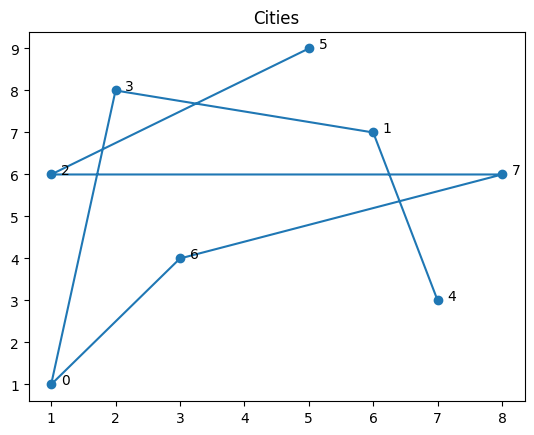

In [11]:
# we can visualize the position of the cities using a scatter plot;
# each city is labeled with its position in the list
def plot_solution(solution, title="Cities"):
    fig, ax = plt.subplots()
    ax.scatter(cities[:,0],cities[:,1])
    plt.plot(cities[solution,0],cities[solution,1])
    plt.title(title)

    for i, txt in enumerate(solution):
        ax.annotate(i, (cities[i,0]+0.15,cities[i,1]))

# test the plot function with a fake random solution 
test_sol = base_individual.copy()
np.random.shuffle(test_sol)
print(test_sol)
plot_solution(test_sol)


In [12]:
# function build the distance matrix for all elements of the x,y coordinates list
def create_distance_matrix(xy_list):
    # define a lambda function to calculate the distance between two points
    dist = lambda p1, p2: np.sqrt(((p1-p2)**2).sum())
    dm = np.asarray([[dist(p1, p2) for p2 in xy_list] for p1 in xy_list])
    return dm

In [13]:
# to improve efficiency, having a small number of cities in the list, it 
# is convenient to pre-calculate the distance matrix to be used in the 
# fitness function
mtx = create_distance_matrix(cities)

np.set_printoptions(precision=3) # limit the number of decimal digits in output
print(mtx)

[[0.    7.81  5.    7.071 6.325 8.944 3.606 8.602]
 [7.81  0.    5.099 4.123 4.123 2.236 4.243 2.236]
 [5.    5.099 0.    2.236 6.708 5.    2.828 7.   ]
 [7.071 4.123 2.236 0.    7.071 3.162 4.123 6.325]
 [6.325 4.123 6.708 7.071 0.    6.325 4.123 3.162]
 [8.944 2.236 5.    3.162 6.325 0.    5.385 4.243]
 [3.606 4.243 2.828 4.123 4.123 5.385 0.    5.385]
 [8.602 2.236 7.    6.325 3.162 4.243 5.385 0.   ]]


In [14]:
# let's define the fitness function: usually a cost function requires minimization
# whereas the fitness has to be maximized; in our case, the goal is to minimize 
# the travelling distance covered by the salesman, which is a cost function, therefore
# it must be transformed to become a fitness function. 
# To calculate the total distance, the elements of the distance matrix are summed such 
# that the source city is used to index the rows of the distance matrix whereas the 
# destination city is used to index the columns.
def fit_function(solution, dist_mtx):
    fit_value = 0.0
    for i in range(len(solution)-1):
        fit_value += dist_mtx[solution[i],solution[i+1]]

    # since the travelled distance cannot be zero, we can simply use the reciprocal of 
    # the total distance as the fitness value of an individual
    return 1/fit_value

In [15]:
# we can test the fitness function with the initial ordering of the list
initial_fitness = fit_function(base_individual, mtx)
print(initial_fitness)

0.025437984919882733


In [16]:
# initialize the population 
def initialize(base_sample, pop_size):
    pop_list = []
    for i in range(pop_size):
        a_solution = base_sample.copy()
        rnd.shuffle(a_solution)
        pop_list.append(a_solution)
    return np.array(pop_list)

In [17]:
initial_population = initialize(base_individual,pop_size)
print(initial_population)

[[6 2 0 5 3 1 7 4]
 [3 1 7 2 5 6 0 4]
 [7 4 0 5 6 3 1 2]
 [6 1 3 5 7 2 0 4]
 [1 3 5 4 7 2 6 0]
 [0 6 2 1 5 7 4 3]
 [4 5 0 3 2 1 6 7]
 [5 1 6 0 7 3 4 2]
 [2 0 6 7 1 3 5 4]
 [3 5 7 0 6 1 2 4]]


With the initial population, the evolutionary process can start creating the generations in a _for loop_ up to the <code>max_generations</code> value. 

For each generation, the three basic genetic operators, selection, crossover, and mutation, are repeatedly performed to build a new population of <code>pop_size</code> individuals.

Out of the new set of individuals, the fittest is selected and used to produce next generation until the best individual amongst all generations is found, which is the best solution for the SGA.

For current example, the **Roulette Wheel selection** operator is applied:

In [18]:
# copy initial population in the new generation variable
new_generation = initial_population.copy()

# code for Roulette Wheel selection
def roulette_wheel_selection(population,dst_mtx):
  
    # computes the total the population fitness
    population_fitness = sum([fit_function(chromosome, dst_mtx) for chromosome in population])
    
    # computes the probability for each chromosome 
    chromosome_probabilities = [fit_function(chromosome, dst_mtx)/population_fitness for chromosome in population]
    
    # selects one chromosome based on the computed probabilities
    return population[np.random.choice(np.arange(len(population)), p=chromosome_probabilities)]

# test the selection operator with the example data structures
new_individual = roulette_wheel_selection(new_generation,mtx)
print(new_individual)

[3 1 7 2 5 6 0 4]


Then a crossover operator must be defined. For current problem, a good option is **ordered crossover**, which behaves like two points crossover but fills the missing genes by scanning the first parent and copying the elements that are not yet present in the offspring. Here's the code:

In [19]:
import numpy as np
import random as rnd

parentA = [1,2,3,4,5,6,7,8,9]
parentB = [4,5,3,6,8,9,7,2,1]
FILL_VAL = -1
xoverProb = 0.7

def orderedXover(pA, pB, probability):
    if rnd.random() <= probability:
        plen = len(pA)
        # generate two crossover points in ascending order
        xoverPoint1 = np.random.randint(plen/2)
        xoverPoint2 = np.random.randint(xoverPoint1,plen)

        # copy all elements between the crossover points from parent A
        offSpring = np.full(plen,FILL_VAL,dtype=int)
        offSpring[xoverPoint1:xoverPoint2] = pA[xoverPoint1:xoverPoint2]

        # copy all elements from parent B that are not yet in the offspring
        i = 0; j = 0
        while i < plen and j < plen: 
            # if current gene is unassigned
            if offSpring[j] == FILL_VAL:
                # skip the source gene if already in the offspring without moving the 
                # target gene
                if pB[i] in offSpring:
                    i += 1
                else:
                    # copy the missing gene in the offspring and increase both counters
                    offSpring[j] = pB[i]  
                    j += 1
                    i += 1
            # if the gene in the offspring contains the value from crossover 
            # increase the index in the target individual
            else:
                j += 1
    else:
        offSpring = pA.copy()
            
    return np.array(offSpring)

print(orderedXover(parentA,parentB,xoverProb))

[1 2 3 4 5 6 8 9 7]


Finally, the mutation operator swaps two randomly selected genes in the newly generated individual according to the assigned probability:

In [26]:
import random as rnd

parent = [4,5,3,6,8,9,7,2,1]
prob = 0.3

def mutation(individual, probability):
    # individual: a chromosome of the population
    # probability: the mutation probability in [0, 1] 
    if rnd.random() <= probability:
        plen = len(individual)
        # randomly select 2 positions for swapping
        pos1 = rnd.randint(0,plen-1)
        pos2 = rnd.randint(0,plen-1)
        individual[pos1],individual[pos2]=individual[pos2],individual[pos1]
    return np.array(individual)

print(mutation(parent, prob))

[4 5 3 6 8 9 7 2 1]


Initial population
 [[4 2 1 7 6 0 3 5]
 [0 1 6 5 2 4 7 3]
 [1 4 3 6 5 2 7 0]
 [0 3 2 7 6 5 4 1]
 [4 2 6 7 3 5 1 0]
 [1 6 2 4 0 3 7 5]
 [5 0 2 4 3 1 7 6]
 [7 5 6 3 4 0 2 1]
 [6 1 2 5 0 7 4 3]
 [0 4 5 1 6 7 3 2]]
Best fitness value:  0.05136967569106332
Best solution:  [0 6 2 3 5 1 7 4]
Best generation:  464


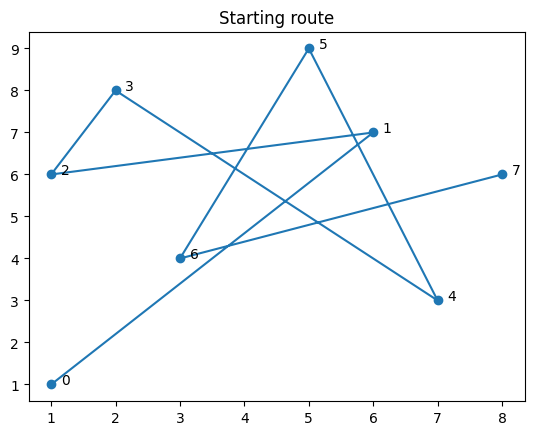

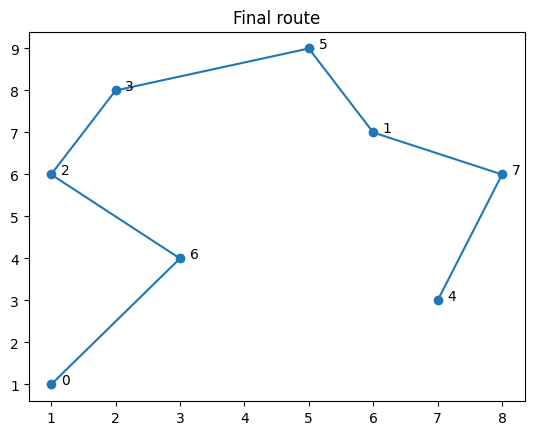

In [28]:
# putting it all together
%matplotlib inline
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

# unordered list of the cities to be visited
cities = np.array([[1,1],[6,7],[1,6],[2,8],[7,3],[5,9],[3,4],[8,6]])
num_cities = cities.shape[0]  # the number of elements in the list

# generate an ordered sequence of indexes for the city list and plot the initial route
base_individual = np.arange(num_cities)  
plot_solution(base_individual,"Starting route")

pop_size = 10   # number of solutions to be analyzed at each generation
max_generations = 1000      # number of generations to be analyzed
xoverProbability = 0.7      # probability of crossover
mutationProbability = 0.4   # probability of mutation

population  = initialize(base_individual,pop_size)  # create initial population
print("Initial population\n",population)

# pre-compute the distance matrix to speed-up fitness calculation
mtx = create_distance_matrix(cities)

# consider the worst fitness value as positive infinity
best_fit = 0 #np.inf
# iterate over all generations
for g in range(max_generations): 
    # compute population fitness for each individual in population
    fitness_list = []
    for i in range(pop_size):
        fit_val = fit_function(population[i],mtx)
        fitness_list.append(fit_val)

    # find the best fitness value for current generation
    current_best_fit = np.max(fitness_list)
    #if current_best_fit <= best_fit:
    if current_best_fit > best_fit:
        # store optimal fitness value and the corresponding solution
        best_fit = current_best_fit
        best_solution = population[np.argmax(fitness_list)].copy()
        best_generation = g
    
    new_population = []
    for i in range(pop_size):
        # select two parents for mating from current population
        pA = roulette_wheel_selection(population,mtx)
        pB = roulette_wheel_selection(population,mtx)
        # apply crossover operator with desired probability
        new_individual = orderedXover(pA,pB,xoverProbability)
        # apply mutation operator with desired probability
        new_individual = mutation(new_individual, prob)
        # add each new individual to the new population
        new_population.append(new_individual)
    
    population = np.array(new_population)

# finally plot the best solution found
print("Best fitness value: ", best_fit)
print("Best solution: ", best_solution)
print("Best generation: ", best_generation)
plot_solution(best_solution,"Final route")